/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


          V1    V2    V3  TARGET    V4  ...    V8    V9   V10  Safra   Mes
V1      1.00 -0.13  0.11    0.04  0.01  ... -0.14  0.03  0.01   0.00  0.00
V2     -0.13  1.00  0.29    0.06  0.04  ... -0.12  0.01  0.05  -0.01 -0.01
V3      0.11  0.29  1.00    0.06  0.11  ... -0.26  0.02  0.07   0.01  0.01
TARGET  0.04  0.06  0.06    1.00 -0.01  ... -0.06  0.06  0.05  -0.00 -0.00
V4      0.01  0.04  0.11   -0.01  1.00  ... -0.05  0.02  0.08   0.01  0.01
V5      0.07  0.01  0.07    0.28  0.01  ... -0.19  0.03  0.07   0.02  0.02
V6      0.05  0.01 -0.03    0.06 -0.37  ...  0.02 -0.00 -0.01   0.00  0.00
V7     -0.02  0.49  0.81    0.04  0.08  ... -0.18  0.02  0.08   0.00  0.00
V8     -0.14 -0.12 -0.26   -0.06 -0.05  ...  1.00 -0.04 -0.04  -0.01 -0.01
V9      0.03  0.01  0.02    0.06  0.02  ... -0.04  1.00  0.02  -0.01 -0.01
V10     0.01  0.05  0.07    0.05  0.08  ... -0.04  0.02  1.00   0.01  0.01
Safra   0.00 -0.01  0.01   -0.00  0.01  ... -0.01 -0.01  0.01   1.00  1.00
Mes     0.00 -0.01  0.01 

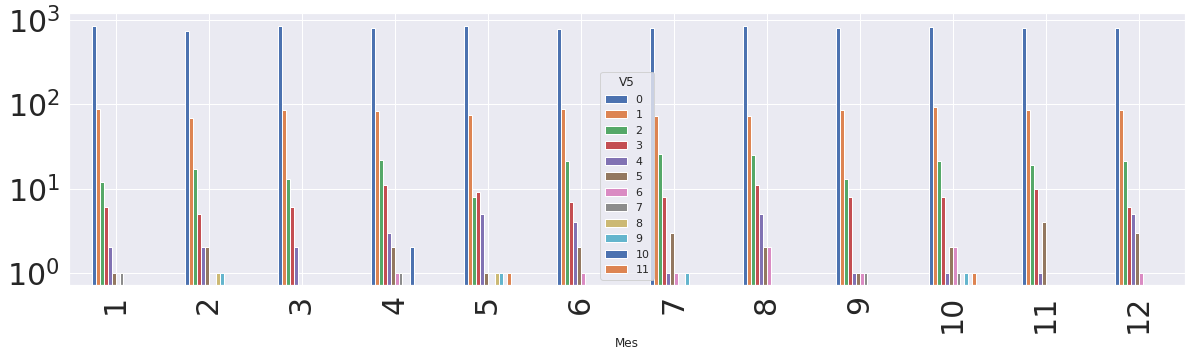

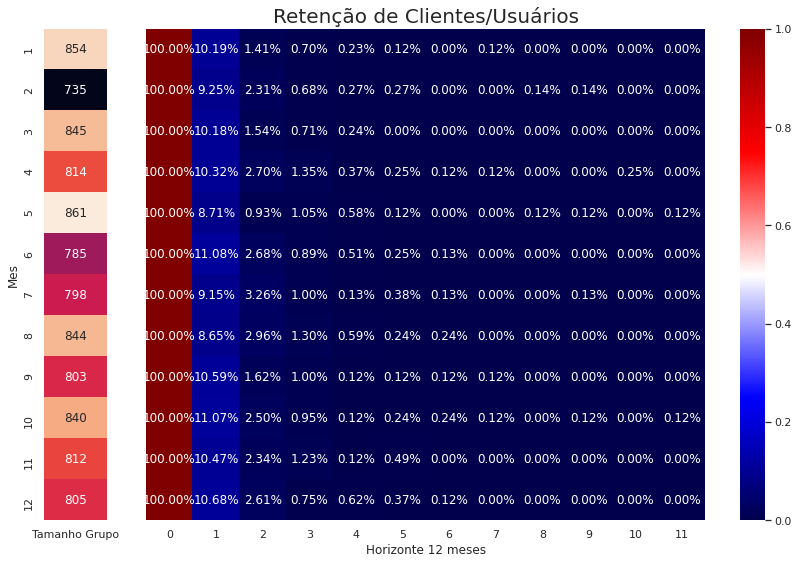

   Features  MIN_VALUE  MAX_VALUE  COUNT  ...  DIST_EVENT  DIST_NON_EVENT   WOE   IV
0        V1       0.00       0.00   9981  ...        0.78            0.89 -0.14 0.11
1        V1       1.00       1.00   1188  ...        0.23            0.11  0.76 0.11
2        V2       0.00       4.70   3748  ...        0.17            0.34 -0.71 0.16
3        V2       4.80      16.00   3701  ...        0.41            0.33  0.21 0.16
4        V2      16.10     100.00   3720  ...        0.42            0.33  0.25 0.16
5        V3       0.00      37.52   2793  ...        0.08            0.25 -1.11 0.41
6        V3      37.60     135.00   2797  ...        0.13            0.25 -0.64 0.41
7        V3     135.05     520.00   2802  ...        0.33            0.25  0.26 0.41
8        V3     520.53   8,540.00   2777  ...        0.46            0.25  0.62 0.41
9        V4       0.00     820.00   3723  ...        0.47            0.33  0.34 0.08
10       V4     822.00   1,905.00   3727  ...        0.28        

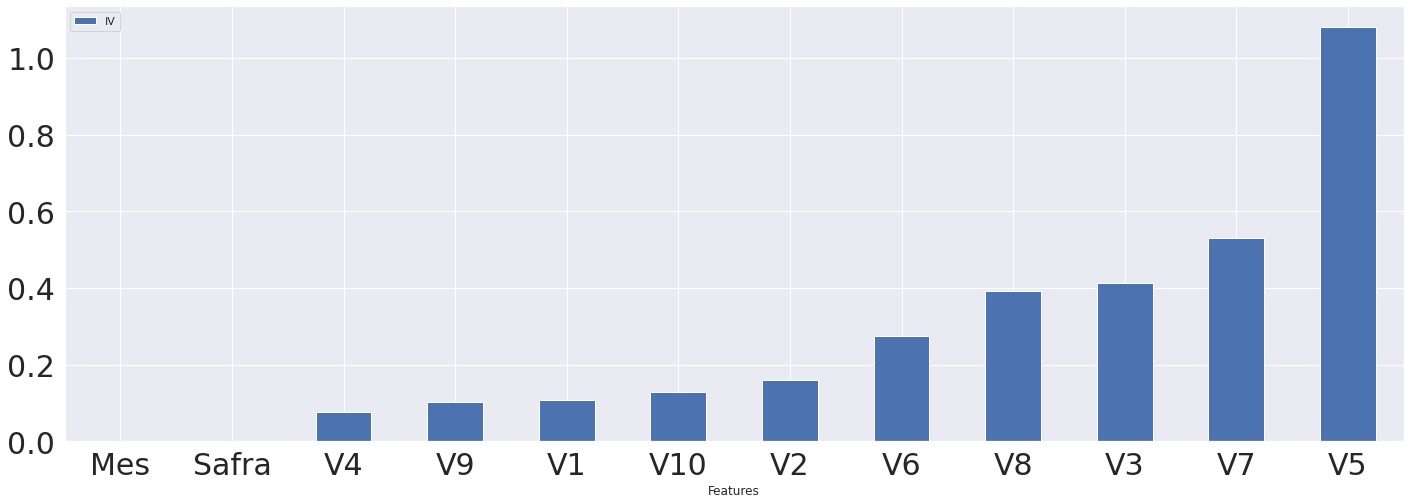

  Predição              Variáveis
0   Inútil           [Mes, Safra]
1    Fraco                   [V4]
2    Médio  [V9, V1, V10, V2, V6]
3    Forte               [V8, V3]
4   Demais               [V7, V5]


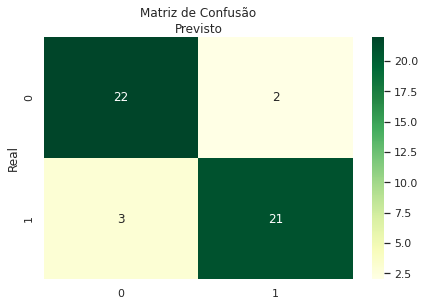

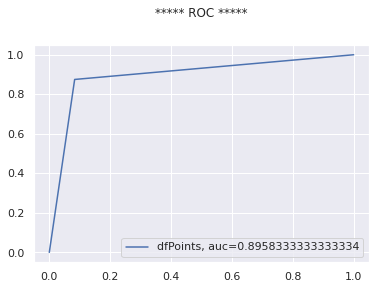


  Análise de sensibilidade e especificidade 
 
True Positive ... =  21
True Negative ... =  22
False Positive .. =  2
False Negative .. =  3
Model Accuracy ...=  0.8958333333333334
Model Sensitivity =  0.875
Model Specificity =  0.9166666666666666


In [1]:
#####  PGM Princiapl

import pandas as pd
import numpy as np
import sklearn as sk
import tensorflow as tf
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 
import seaborn as sn
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 


df_crop = pd.read_csv('dataset_test_ds.csv',delimiter=';')

df_crop['Mes'] = pd.DatetimeIndex(pd.to_datetime((df_crop.Safra.astype(str) + '01'), format='%Y%m%d')).month.astype(int)
# Correlação de Pearson
print(df_crop.corr())

# Análise de cohort

df = df_crop
df1 = df.groupby(by=['Mes', 'V5']).size().unstack().fillna(0).astype(int)


df1.plot(kind='bar', figsize=(20,5), logy=True, fontsize=30)
plt.show()

cohort_pivot = df1

cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

with sns.axes_style("dark"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.2%', 
                cmap='seismic', 
                ax=ax[1])
    ax[1].set_title('Retenção de Clientes/Usuários', fontsize=20)
    ax[1].set(xlabel='Horizonte 12 meses',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'Tamanho Grupo'})
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                color='white', 
                ax=ax[0])

    fig.tight_layout()
    plt.savefig('cohort.png', dpi=None, facecolor='w', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    plt.show()


#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$44
# Achar melhores variáveis com WoE

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["Features"] = "VAR"
    d3 = d3[['Features','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["Features"] = "VAR"
    d3 = d3[['Features','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["Features"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["Features"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('Features').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

final_iv, IV = data_vars(df_crop, df_crop.TARGET)
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$44
print(final_iv)

candidatas = IV.sort_values('IV')
candidatas.plot(x='Features',y='IV', kind='bar',figsize=(24,8), rot=0,fontsize=30)
plt.savefig('candidatas.png', dpi=None, facecolor='w', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()


MelhoresCandidatas =  pd.DataFrame(data=None, columns=['Predição', 'Variáveis'])
tipos = ['Inútil','Fraco','Médio','Forte','Demais']
candidatas['Classe'] = ((candidatas.IV) <  0.02)*0 + (((candidatas.IV)>= 0.02) & ((candidatas.IV) <  0.1))*1 + (((candidatas.IV)>= 0.1) & ((candidatas.IV) <  0.3))*2 + (((candidatas.IV)>= 0.3) & ((candidatas.IV) <  0.5))*3 + ((candidatas.IV)>= 0.5)*4
trows=0

for x in candidatas.Classe.unique():
  new = [tipos[x],candidatas[candidatas.Classe == x].Features.values]
  MelhoresCandidatas.loc[trows]= new
  trows += 1

print(MelhoresCandidatas)
MelhoresCandidatas.to_excel('MelhoresCandidatas.xlsx')
# Preparar para os algoritmos.

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 

cols = np.concatenate(MelhoresCandidatas[MelhoresCandidatas.Predição.isin(['Médio','Forte'])].Variáveis.values)

X_train = df_crop[cols]
y_train = df_crop.TARGET


nr = NearMiss(return_indices=True)

X_train, y_train, indices = nr.fit_sample(X_train, y_train)


X_trainA = X_train
y_trainA = y_train
df_X = pd.DataFrame(data=X_train, columns = cols)
X_train = df_X

#Random Forest


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

modelo = RandomForestClassifier()

modelo.fit(X_train, y_train)
 
# Predict on training set
Y_predict = modelo.predict(X_test)

# Gerando a  Confusion Matrix
 
confusion_matrix = metrics.confusion_matrix(y_test, Y_predict)
 
 
# mostrar confusion matrix
 
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGn" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.savefig('ConfusMatrix.png', dpi=None, facecolor='w', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()
 
# mostrando ROC/AUC curve
 
False_P_rate, True_P_rate, _ = metrics.roc_curve(y_test,  Y_predict)
auc = metrics.roc_auc_score(y_test,  Y_predict)
 
plt.title('***** ROC *****', y=1.1)
plt.plot(False_P_rate,True_P_rate,label="dfPoints, auc="+str(auc))
plt.legend(loc=4)
plt.savefig('ROC.png', dpi=None, facecolor='w', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
plt.show()
 
# Performance 
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]
 
print('\n \033[1m Análise de sensibilidade e especificidade \n \033[0m')

print('True Positive ... = ',TP)
print('True Negative ... = ',TN)
print('False Positive .. = ',FP)
print('False Negative .. = ',FN)
 
ModelAccuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Model Accuracy ...= ',ModelAccuracy)
 
sensitivity = TP / float(FN + TP)
 
print('Model Sensitivity = ', sensitivity)
 
specificity = TN / (TN + FP)
 
print('Model Specificity = ', specificity)






In [ ]:
RECALL= Sensibility = Sensibilidade



X_train = df_crop[cols]
y_train = df_crop.TARGET
print(y_train.value_counts())

nr = NearMiss(return_indices=True)

X_train, y_train, indices = nr.fit_sample(X_train, y_train)
print(pd.value_counts(y_train))

0    11049
1      120
Name: TARGET, dtype: int64
1    120
0    120
dtype: int64


In [ ]:
candidatas.Classe.unique()

array([0, 1, 2, 3, 4])

In [ ]:
final_iv

Features  MIN_VALUE  MAX_VALUE  COUNT  ...  DIST_EVENT  DIST_NON_EVENT   WOE   IV
0        V1       0.00       0.00   9981  ...        0.78            0.89 -0.14 0.11
1        V1       1.00       1.00   1188  ...        0.23            0.11  0.76 0.11
2        V2       0.00       4.70   3748  ...        0.17            0.34 -0.71 0.16
3        V2       4.80      16.00   3701  ...        0.41            0.33  0.21 0.16
4        V2      16.10     100.00   3720  ...        0.42            0.33  0.25 0.16
5        V3       0.00      37.52   2793  ...        0.08            0.25 -1.11 0.41
6        V3      37.60     135.00   2797  ...        0.13            0.25 -0.64 0.41
7        V3     135.05     520.00   2802  ...        0.33            0.25  0.26 0.41
8        V3     520.53   8,540.00   2777  ...        0.46            0.25  0.62 0.41
9        V4       0.00     820.00   3723  ...        0.47            0.33  0.34 0.08
10       V4     822.00   1,905.00   3727  ...        0.28            0.33 -0.20 0.08
11       V4   1,906.00  15,616.00   3719  ...        0.26            0.33 -0.26 0.08
12       V5       0.00       1.00  10778  ...        0.61            0.97 -0.47 1.08
13       V5       2.00      11.00    391  ...        0.39            0.03  2.53 1.08
14       V6       0.00       0.00   9182  ...        0.59            0.82 -0.33 0.27
15       V6       1.00       1.00   1987  ...        0.41            0.18  0.85 0.27
16       V7       0.00      32.06   1399  ...        0.03            0.13 -1.33 0.53
17       V7      32.08      77.42   1394  ...        0.04            0.13 -1.10 0.53
18       V7      77.50     182.37   1397  ...        0.07            0.13 -0.63 0.53
19       V7     182.40     414.07   1395  ...        0.07            0.13 -0.63 0.53
20       V7     414.26   1,008.92   1396  ...        0.10            0.13 -0.23 0.53
21       V7   1,009.34   2,799.06   1396  ...        0.16            0.12  0.24 0.53
22       V7   2,802.12   9,279.84   1396  ...        0.24            0.12  0.67 0.53
23       V7   9,302.14 143,268.55   1396  ...        0.29            0.12  0.86 0.53
24       V8       0.00       0.00   6729  ...        0.87            0.60  0.37 0.39
25       V8       1.00       1.00   4440  ...        0.13            0.40 -1.10 0.39
26       V9       0.00       0.00  11074  ...        0.94            0.99 -0.05 0.10
27       V9       1.00       1.00     95  ...        0.06            0.01  1.99 0.10
28      V10       0.00       0.00  10828  ...        0.88            0.97 -0.09 0.13
29      V10       1.00       1.00    341  ...        0.12            0.03  1.37 0.13
30    Safra 201,901.00 201,907.00   6466  ...        0.59            0.58  0.02 0.00
31    Safra 201,908.00 201,912.00   4703  ...        0.41            0.42 -0.03 0.00
32      Mes       1.00       7.00   6466  ...        0.59            0.58  0.02 0.00
33      Mes       8.00      12.00   4703  ...        0.41            0.42 -0.03 0.00

[34 rows x 12 columns]

In [ ]:
df_crop.TARGET.value_counts()

0    11049
1      120
Name: TARGET, dtype: int64

In [ ]:
pd.value_counts(y_train)

1    96
0    96
dtype: int64

In [ ]:
pd.value_counts(y_test)

1    24
0    24
dtype: int64

In [ ]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0])

In [ ]:
Y_predict

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1])

In [ ]:
df_crop.TARGET.value_counts()

0    11049
1      120
Name: TARGET, dtype: int64

In [ ]:
MelhoresCandidatas

Predição              Variáveis
0   Inútil           [Mes, Safra]
1    Fraco                   [V4]
2    Médio  [V9, V1, V10, V2, V6]
3    Forte               [V8, V3]
4   Demais               [V7, V5]

In [ ]:
df = df_crop
df1 = df.groupby(by=['Mes', 'V5']).size().unstack().fillna(0).astype(int)
df1.head(30)

V5    0   1   2   3   4   5   6   7   8   9   10  11
Mes                                                 
1    854  87  12   6   2   1   0   1   0   0   0   0
2    735  68  17   5   2   2   0   0   1   1   0   0
3    845  86  13   6   2   0   0   0   0   0   0   0
4    814  84  22  11   3   2   1   1   0   0   2   0
5    861  75   8   9   5   1   0   0   1   1   0   1
6    785  87  21   7   4   2   1   0   0   0   0   0
7    798  73  26   8   1   3   1   0   0   1   0   0
8    844  73  25  11   5   2   2   0   0   0   0   0
9    803  85  13   8   1   1   1   1   0   0   0   0
10   840  93  21   8   1   2   2   1   0   1   0   1
11   812  85  19  10   1   4   0   0   0   0   0   0
12   805  86  21   6   5   3   1   0   0   0   0   0

In [ ]:
candidatas

Features   IV  Classe
0       Mes 0.00       0
1     Safra 0.00       0
6        V4 0.08       1
11       V9 0.10       2
2        V1 0.11       2
3       V10 0.13       2
4        V2 0.16       2
8        V6 0.27       2
10       V8 0.39       3
5        V3 0.41       3
9        V7 0.53       4
7        V5 1.08       4

In [ ]:
candidatas

In [ ]:
candidatas.Classe.unique()

array([0, 1, 2, 3, 4])

In [ ]:
df = df_crop
df1 = df.groupby(by=['Mes', 'V5']).size().unstack().fillna(0).astype(int)
df1.head(40)

In [ ]:
cohort_size

Mes
1     854
2     735
3     845
4     814
5     861
6     785
7     798
8     844
9     803
10    840
11    812
12    805
Name: 0, dtype: int64

In [ ]:
retention_matrix

V5     0     1     2     3     4     5     6     7     8     9     10    11
Mes                                                                        
1   1.000 0.102 0.014 0.007 0.002 0.001 0.000 0.001 0.000 0.000 0.000 0.000
2   1.000 0.093 0.023 0.007 0.003 0.003 0.000 0.000 0.001 0.001 0.000 0.000
3   1.000 0.102 0.015 0.007 0.002 0.000 0.000 0.000 0.000 0.000 0.000 0.000
4   1.000 0.103 0.027 0.014 0.004 0.002 0.001 0.001 0.000 0.000 0.002 0.000
5   1.000 0.087 0.009 0.010 0.006 0.001 0.000 0.000 0.001 0.001 0.000 0.001
6   1.000 0.111 0.027 0.009 0.005 0.003 0.001 0.000 0.000 0.000 0.000 0.000
7   1.000 0.091 0.033 0.010 0.001 0.004 0.001 0.000 0.000 0.001 0.000 0.000
8   1.000 0.086 0.030 0.013 0.006 0.002 0.002 0.000 0.000 0.000 0.000 0.000
9   1.000 0.106 0.016 0.010 0.001 0.001 0.001 0.001 0.000 0.000 0.000 0.000
10  1.000 0.111 0.025 0.010 0.001 0.002 0.002 0.001 0.000 0.001 0.000 0.001
11  1.000 0.105 0.023 0.012 0.001 0.005 0.000 0.000 0.000 0.000 0.000 0.000
12  1.000 0.107 0.026 0.007 0.006 0.004 0.001 0.000 0.000 0.000 0.000 0.000

In [ ]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0])

In [ ]:
Y_predict

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1])

In [ ]:
modelo.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
X_train

V9   V1  V10     V2   V6   V8       V3
139 0.00 0.00 0.00 100.00 1.00 0.00   455.00
60  0.00 0.00 0.00   8.90 0.00 0.00    80.00
204 0.00 0.00 0.00   4.30 1.00 0.00    80.00
186 0.00 0.00 0.00   5.20 0.00 0.00   908.00
207 0.00 0.00 0.00   0.00 0.00 0.00   705.00
..   ...  ...  ...    ...  ...  ...      ...
106 0.00 1.00 0.00  10.00 0.00 0.00   510.00
14  0.00 1.00 0.00  10.00 0.00 0.00 2,999.00
92  0.00 1.00 0.00  10.00 0.00 0.00    79.99
179 0.00 1.00 0.00  10.00 1.00 1.00   900.00
102 0.00 0.00 0.00   7.00 1.00 1.00    78.98

[192 rows x 7 columns]

In [ ]:
df_crop.TARGET.value_counts()

0    11049
1      120
Name: TARGET, dtype: int64

In [ ]:
pd.value_counts(y_train)

1    96
0    96
dtype: int64

In [ ]:
cols

array(['V9', 'V1', 'V10', 'V2', 'V6', 'V8', 'V3'], dtype=object)

In [ ]:
x = np.array([1.,2.,3.,4.,5.,6.,7.,8.])
faixas= ['reprovou','passou','mereceu']
classe = (x<4)*0 + ((x>=4) & (x<7))*1 + (x>6)*2


array([0, 0, 0, 1, 1, 1, 2, 2])

In [ ]:
x

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

In [ ]:
candidatas

Features   IV  Classe
0       Mes 0.00       0
1     Safra 0.00       0
6        V4 0.08       1
11       V9 0.10       2
2        V1 0.11       2
3       V10 0.13       2
4        V2 0.16       2
8        V6 0.27       2
10       V8 0.39       3
5        V3 0.41       3
9        V7 0.53       4
7        V5 1.08       4

In [ ]:
candidatas.sort_index()

Features   IV  Classe
0       Mes 0.00       0
1     Safra 0.00       0
2        V1 0.11       2
3       V10 0.13       2
4        V2 0.16       2
5        V3 0.41       3
6        V4 0.08       1
7        V5 1.08       4
8        V6 0.27       2
9        V7 0.53       4
10       V8 0.39       3
11       V9 0.10       2

In [ ]:
candidatas.Classe.unique()

array([0, 1, 2, 3, 4])

In [ ]:
df_crop.describe()

V1        V2        V3  ...       V10      Safra       Mes
count 11,169.00 11,169.00 11,169.00  ... 11,169.00  11,169.00 11,169.00
mean       0.11     19.73    531.05  ...      0.03 201,906.52      6.52
std        0.31     25.44    906.63  ...      0.17       3.45      3.45
min        0.00      0.00      0.00  ...      0.00 201,901.00      1.00
25%        0.00      2.80     37.52  ...      0.00 201,904.00      4.00
50%        0.00     10.00    135.00  ...      0.00 201,907.00      7.00
75%        0.00     25.20    520.00  ...      0.00 201,910.00     10.00
max        1.00    100.00  8,540.00  ...      1.00 201,912.00     12.00

[8 rows x 13 columns]

In [ ]:
lista

[array(['V9', 'V1', 'V10', 'V2', 'V6'], dtype=object),
 array(['V8', 'V3'], dtype=object)]

In [ ]:
IV.sort_values(by='IV',ascending=False)

Features   IV
7        V5 1.08
9        V7 0.53
5        V3 0.41
10       V8 0.39
8        V6 0.27
4        V2 0.16
3       V10 0.13
2        V1 0.11
11       V9 0.10
6        V4 0.08
0       Mes 0.00
1     Safra 0.00

In [ ]:
MelhoresCandidatas

Predição              Variáveis
0   Inútil           [Mes, Safra]
1    Fraco                   [V4]
2    Médio  [V9, V1, V10, V2, V6]
3    Forte               [V8, V3]
4   Demais               [V7, V5]

In [ ]:
df = df_crop
df1 = df.groupby(by=['Mes', 'V5']).size().unstack().fillna(0).astype(int)
df1

V5    0   1   2   3   4   5   6   7   8   9   10  11
Mes                                                 
1    854  87  12   6   2   1   0   1   0   0   0   0
2    735  68  17   5   2   2   0   0   1   1   0   0
3    845  86  13   6   2   0   0   0   0   0   0   0
4    814  84  22  11   3   2   1   1   0   0   2   0
5    861  75   8   9   5   1   0   0   1   1   0   1
6    785  87  21   7   4   2   1   0   0   0   0   0
7    798  73  26   8   1   3   1   0   0   1   0   0
8    844  73  25  11   5   2   2   0   0   0   0   0
9    803  85  13   8   1   1   1   1   0   0   0   0
10   840  93  21   8   1   2   2   1   0   1   0   1
11   812  85  19  10   1   4   0   0   0   0   0   0
12   805  86  21   6   5   3   1   0   0   0   0   0

In [ ]:
MelhoresCandidatas

Predição              Variáveis
0   Inútil           [Mes, Safra]
1    Fraco                   [V4]
2    Médio  [V9, V1, V10, V2, V6]
3    Forte               [V8, V3]
4   Demais               [V7, V5]

In [ ]:
cols

array(['V9', 'V1', 'V10', 'V2', 'V6', 'V8', 'V3'], dtype=object)

In [ ]:
df_crop.TARGET.value_counts()

0    11049
1      120
Name: TARGET, dtype: int64

In [ ]:
modelo.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pd.value_counts(y_train)

1    96
0    96
dtype: int64

In [ ]:
df_crop.TARGET.value_counts()

0    11049
1      120
Name: TARGET, dtype: int64

In [ ]:
candidatas[candidatas.Classe == 2].Features.values

array(['V9', 'V1', 'V10', 'V2', 'V6'], dtype=object)

In [ ]:
candidatas

Features   IV  Classe
0       Mes 0.00       0
1     Safra 0.00       0
6        V4 0.08       1
11       V9 0.10       2
2        V1 0.11       2
3       V10 0.13       2
4        V2 0.16       2
8        V6 0.27       2
10       V8 0.39       3
5        V3 0.41       3
9        V7 0.53       4
7        V5 1.08       4

In [ ]:
IV.sort_values('IV')

Features   IV
0       Mes 0.00
1     Safra 0.00
6        V4 0.08
11       V9 0.10
2        V1 0.11
3       V10 0.13
4        V2 0.16
8        V6 0.27
10       V8 0.39
5        V3 0.41
9        V7 0.53
7        V5 1.08

In [ ]:
df_crop

V1    V2       V3  TARGET    V4  V5  ...        V7  V8  V9  V10   Safra  Mes
0       0  8.10     9.99       0  1968   0  ...     15.15   0   0    0  201901    1
1       0  4.40    35.00       0  1369   0  ...     63.98   1   0    0  201910   10
2       0  0.70    52.99       0  1228   0  ...     98.84   0   0    0  201906    6
3       0 63.30   810.00       0     0   0  ...  9,237.21   0   0    0  201910   10
4       0  4.10    17.50       0     0   0  ...     27.70   1   0    0  201902    2
...    ..   ...      ...     ...   ...  ..  ...       ...  ..  ..  ...     ...  ...
11164   0 86.40     5.00       0  1964   0  ...     31.57   1   0    0  201909    9
11165   0  6.70    55.00       0     0   0  ...    114.51   0   0    0  201909    9
11166   0  1.20   100.00       0  1120   0  ...    213.57   1   0    0  201901    1
11167   0 11.00    85.00       0  2005   0  ...    208.33   0   0    0  201911   11
11168   0 97.90 2,230.00       0  1440   0  ... 51,997.12   0   0    0  201906    6

[11169 rows x 13 columns]

In [ ]:
df = df_crop
df1 = df.groupby(by=['V5','Mes']).size().unstack().fillna(0).astype(int)
df1

Mes   1    2    3    4    5    6    7    8    9    10   11   12
V5                                                             
0    854  735  845  814  861  785  798  844  803  840  812  805
1     87   68   86   84   75   87   73   73   85   93   85   86
2     12   17   13   22    8   21   26   25   13   21   19   21
3      6    5    6   11    9    7    8   11    8    8   10    6
4      2    2    2    3    5    4    1    5    1    1    1    5
5      1    2    0    2    1    2    3    2    1    2    4    3
6      0    0    0    1    0    1    1    2    1    2    0    1
7      1    0    0    1    0    0    0    0    1    1    0    0
8      0    1    0    0    1    0    0    0    0    0    0    0
9      0    1    0    0    1    0    1    0    0    1    0    0
10     0    0    0    2    0    0    0    0    0    0    0    0
11     0    0    0    0    1    0    0    0    0    1    0    0

In [ ]:
df_crop.TARGET.value_counts()

0    11049
1      120
Name: TARGET, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import tensorflow as tf
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 
import seaborn as sn
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df7 = df_crop.groupby(by=['Mes', 'V5']).size().unstack().fillna(0).astype(int)

In [ ]:
cols

array(['V9', 'V1', 'V10', 'V2', 'V6', 'V8', 'V3'], dtype=object)

In [ ]:
df7

V5    0   1   2   3   4   5   6   7   8   9   10  11
Mes                                                 
1    854  87  12   6   2   1   0   1   0   0   0   0
2    735  68  17   5   2   2   0   0   1   1   0   0
3    845  86  13   6   2   0   0   0   0   0   0   0
4    814  84  22  11   3   2   1   1   0   0   2   0
5    861  75   8   9   5   1   0   0   1   1   0   1
6    785  87  21   7   4   2   1   0   0   0   0   0
7    798  73  26   8   1   3   1   0   0   1   0   0
8    844  73  25  11   5   2   2   0   0   0   0   0
9    803  85  13   8   1   1   1   1   0   0   0   0
10   840  93  21   8   1   2   2   1   0   1   0   1
11   812  85  19  10   1   4   0   0   0   0   0   0
12   805  86  21   6   5   3   1   0   0   0   0   0

In [ ]:
df8 = df_crop[['Mes','V5','V7']].groupby(by=['Mes', 'V5']).sum().unstack().fillna(0).astype(int)

In [ ]:
df8

V7                                 ...                                
V5        0       1       2       3      4   ...     7     8      9    10     11
Mes                                          ...                                
1    3834524  476735   98574   10655    142  ...    411     0      0    0      0
2    3030014  242555   98332   42447   4004  ...      0  1739  14408    0      0
3    4123840  490059   38269   24165     52  ...      0     0      0    0      0
4    3046068  316191  142257   39392    704  ...  13320     0      0  772      0
5    3452775  443901   11638   34652  26568  ...      0    16  27224    0     43
6    2865528  372383  191597    9810   3989  ...      0     0      0    0      0
7    2839619  375281  187394   57654     22  ...      0     0    745    0      0
8    4283240  347672   89108   51886  76196  ...      0     0      0    0      0
9    3096381  231457  190388   70715    696  ...    216     0      0    0      0
10   4028783  580013   96004   14983  14771  ...    753     0    100    0  14408
11   3205028  475067  113167  126658  14857  ...      0     0      0    0      0
12   3571045  541927  103783    5307  32940  ...      0     0      0    0      0

[12 rows x 12 columns]

In [ ]:
df_crop = pd.read_csv('dataset_test_ds.csv',delimiter=';')

In [ ]:
df_crop.head(10)

V1     V2     V3  TARGET    V4  V5  V6       V7  V8  V9  V10   Safra
0   0   8.10   9.99       0  1968   0   0    15.15   0   0    0  201901
1   0   4.40  35.00       0  1369   0   0    63.98   1   0    0  201910
2   0   0.70  52.99       0  1228   0   0    98.84   0   0    0  201906
3   0  63.30 810.00       0     0   0   1 9,237.21   0   0    0  201910
4   0   4.10  17.50       0     0   0   1    27.70   1   0    0  201902
5   0   1.70 188.00       0  1303   0   0   459.39   0   0    0  201910
6   0 100.00 105.00       0     0   0   1 1,331.67   0   0    0  201905
7   0   0.70  29.00       0  1800   0   0    47.95   1   0    0  201901
8   0   0.20   1.50       0  1997   0   0     1.36   0   0    0  201910
9   0   1.10  30.00       0   925   0   0    50.28   1   0    0  201902

In [ ]:
df_crop.describe()

V1        V2        V3  ...        V9       V10      Safra
count 11,169.00 11,169.00 11,169.00  ... 11,169.00 11,169.00  11,169.00
mean       0.11     19.73    531.05  ...      0.01      0.03 201,906.52
std        0.31     25.44    906.63  ...      0.09      0.17       3.45
min        0.00      0.00      0.00  ...      0.00      0.00 201,901.00
25%        0.00      2.80     37.52  ...      0.00      0.00 201,904.00
50%        0.00     10.00    135.00  ...      0.00      0.00 201,907.00
75%        0.00     25.20    520.00  ...      0.00      0.00 201,910.00
max        1.00    100.00  8,540.00  ...      1.00      1.00 201,912.00

[8 rows x 12 columns]

In [ ]:
df_crop.V1.value_counts()

0    9981
1    1188
Name: V1, dtype: int64

In [ ]:
df_crop.V2.unique()

In [ ]:
df_crop.V5.unique()

array([ 0,  2,  1,  4,  5,  3,  7,  9,  6, 11, 10,  8])

In [ ]:
df_crop.Safra.value_counts()

201910    970
201901    963
201908    962
201905    962
201903    952
201904    940
201911    931
201912    927
201909    913
201907    911
201906    907
201902    831
Name: Safra, dtype: int64

In [ ]:
df_crop.shape

(11169, 12)

In [ ]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11169 entries, 0 to 11168
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      11169 non-null  int64  
 1   V2      11169 non-null  float64
 2   V3      11169 non-null  float64
 3   TARGET  11169 non-null  int64  
 4   V4      11169 non-null  int64  
 5   V5      11169 non-null  int64  
 6   V6      11169 non-null  int64  
 7   V7      11169 non-null  float64
 8   V8      11169 non-null  int64  
 9   V9      11169 non-null  int64  
 10  V10     11169 non-null  int64  
 11  Safra   11169 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.0 MB


In [ ]:
corrMatrix = df_crop.corr(method='spearman')
corrMatrix.sort_values('TARGET',inplace=True, ascending=False)
colu = corrMatrix.index
plt.figure(figsize=(15,10))
sn.set(font_scale=0.8)
sn.heatmap(corrMatrix[colu], annot=True,cmap='Oranges')
plt.savefig('CrossFeatures.png', dpi=None, facecolor='w', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None)


plt.show()


In [ ]:
df_crop.TARGET.value_counts()


0    11049
1      120
Name: TARGET, dtype: int64

In [ ]:
plt.scatter(df_crop.V7,df_crop.TARGET)

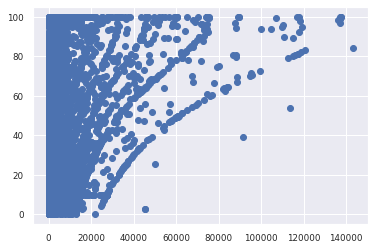

In [ ]:
plt.scatter(df_crop.V7,df_crop.V2)
plt.savefig('V7vsV2.png', dpi=None, facecolor='w', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None)
plt.show()

In [ ]:
plt.scatter(df_crop.V7,df_crop.V3)
plt.savefig('V7vsV2.png', dpi=None, facecolor='w', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None)
plt.show()

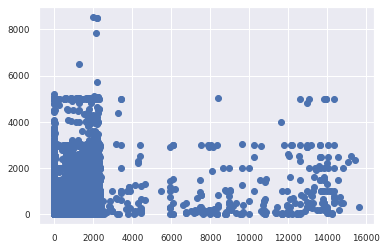

In [ ]:
plt.scatter(df_crop.V4,df_crop.V3)
plt.savefig('V7vsV2.png', dpi=None, facecolor='w', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None)
plt.show()

In [ ]:
plt.scatter(df_crop.V4,df_crop.V5)

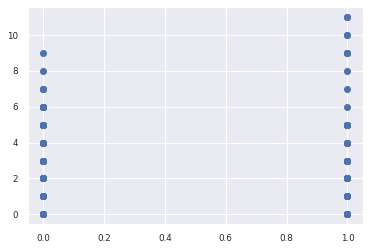

In [ ]:
plt.scatter(df_crop.TARGET,df_crop.V5)

In [ ]:
df_crop.V5.unique()

array([ 0,  2,  1,  4,  5,  3,  7,  9,  6, 11, 10,  8])

In [ ]:
df_crop.head(10)

V1     V2     V3  TARGET    V4  V5  V6       V7  V8  V9  V10   Safra
0   0   8.10   9.99       0  1968   0   0    15.15   0   0    0  201901
1   0   4.40  35.00       0  1369   0   0    63.98   1   0    0  201910
2   0   0.70  52.99       0  1228   0   0    98.84   0   0    0  201906
3   0  63.30 810.00       0     0   0   1 9,237.21   0   0    0  201910
4   0   4.10  17.50       0     0   0   1    27.70   1   0    0  201902
5   0   1.70 188.00       0  1303   0   0   459.39   0   0    0  201910
6   0 100.00 105.00       0     0   0   1 1,331.67   0   0    0  201905
7   0   0.70  29.00       0  1800   0   0    47.95   1   0    0  201901
8   0   0.20   1.50       0  1997   0   0     1.36   0   0    0  201910
9   0   1.10  30.00       0   925   0   0    50.28   1   0    0  201902

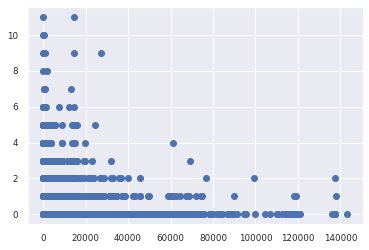

In [ ]:
plt.scatter(df_crop.V7,df_crop.V5)

In [ ]:
plt.scatter(df_crop.V1,df_crop.V7)

In [ ]:
df_crop.V1.value_counts()

0    9981
1    1188
Name: V1, dtype: int64

In [ ]:
plt.scatter(df_crop.V6,df_crop.V7)

In [ ]:
df_crop.V6.value_counts()


0    9182
1    1987
Name: V6, dtype: int64

In [ ]:
df_crop.V8.value_counts()

0    6729
1    4440
Name: V8, dtype: int64

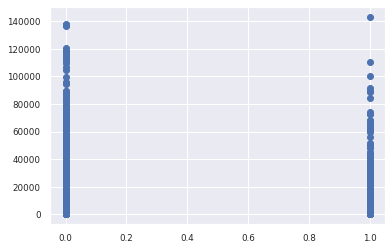

In [ ]:
plt.scatter(df_crop.V8,df_crop.V7)

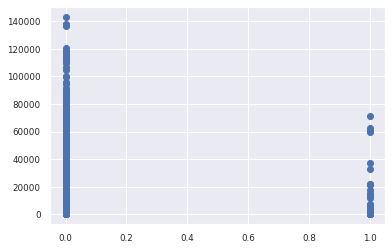

In [ ]:
plt.scatter(df_crop.V9,df_crop.V7)

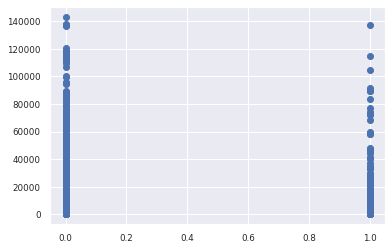

In [ ]:
plt.scatter(df_crop.V10,df_crop.V7)

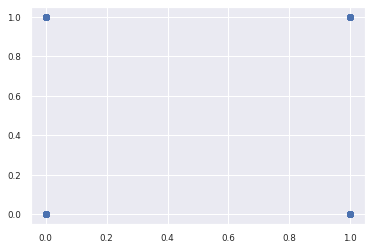

In [ ]:
plt.scatter(df_crop.V9,df_crop.V10)

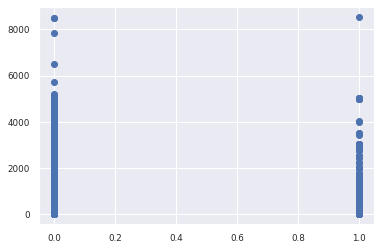

In [ ]:
plt.scatter(df_crop.V10,df_crop.V3)

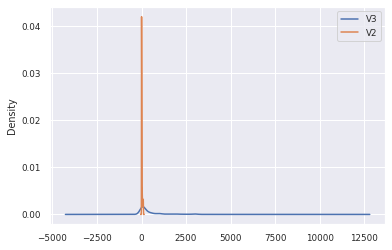

In [ ]:
df_crop[['V3','V2']].plot(kind='kde')

In [ ]:
df1

V5    0   1   2   3   4   5   6   7   8   9   10  11
Mes                                                 
1    854  87  12   6   2   1   0   1   0   0   0   0
2    735  68  17   5   2   2   0   0   1   1   0   0
3    845  86  13   6   2   0   0   0   0   0   0   0
4    814  84  22  11   3   2   1   1   0   0   2   0
5    861  75   8   9   5   1   0   0   1   1   0   1
6    785  87  21   7   4   2   1   0   0   0   0   0
7    798  73  26   8   1   3   1   0   0   1   0   0
8    844  73  25  11   5   2   2   0   0   0   0   0
9    803  85  13   8   1   1   1   1   0   0   0   0
10   840  93  21   8   1   2   2   1   0   1   0   1
11   812  85  19  10   1   4   0   0   0   0   0   0
12   805  86  21   6   5   3   1   0   0   0   0   0

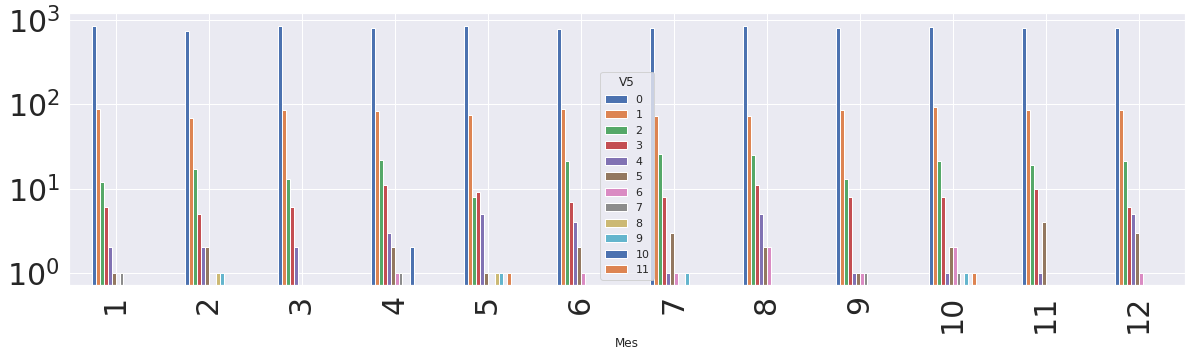

In [ ]:
df1.plot(kind='bar', figsize=(20,5), logy=True,fontsize=30)

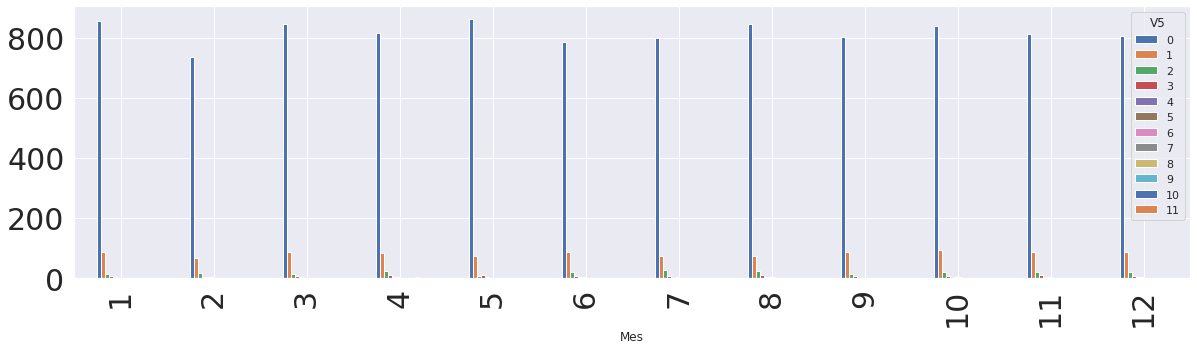

In [ ]:
df1.plot(kind='bar', figsize=(20,5),fontsize=30)

In [ ]:
df_crop.columns

Index(['V1', 'V2', 'V3', 'TARGET', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'Safra', 'Mes'],
      dtype='object')

In [ ]:

df = df_crop.groupby(by='V5').sum()

In [ ]:
df

V1         V2           V3  TARGET  ...  V9  V10       Safra    Mes
V5                                       ...                            
0   959 192,476.00 4,982,262.57      48  ...  68  268  1977876087  63687
1   149  19,419.70   628,132.46      25  ...  20   40   198272271   6471
2    41   4,602.50   177,196.47      15  ...   4   17    44015709   1509
3    18   1,967.00    70,454.26       9  ...   1    7    19181143    643
4     8     781.80    26,252.74       5  ...   1    2     6461010    210
5     8     508.00    25,430.76       8  ...   0    1     4643876    176
6     3     273.90     7,136.76       1  ...   1    1     1817174     74
7     1     136.90     2,405.99       1  ...   0    1      807624     24
8     0      29.90       516.83       1  ...   0    1      403807      7
9     1      90.40     8,156.00       3  ...   0    2      807624     24
10    0       9.30       300.00       2  ...   0    1      403808      8
11    0      28.40     3,018.00       2  ...   0    0      403815     15

[12 rows x 12 columns]

In [ ]:
df_crop.head()

V1    V2     V3  TARGET    V4  V5  V6       V7  V8  V9  V10   Safra  Mes
0   0  8.10   9.99       0  1968   0   0    15.15   0   0    0  201901    1
1   0  4.40  35.00       0  1369   0   0    63.98   1   0    0  201910   10
2   0  0.70  52.99       0  1228   0   0    98.84   0   0    0  201906    6
3   0 63.30 810.00       0     0   0   1 9,237.21   0   0    0  201910   10
4   0  4.10  17.50       0     0   0   1    27.70   1   0    0  201902    2

In [ ]:
df = df_crop

df1 = df.groupby(by=['Mes', 'V5']).size().unstack().fillna(0).astype(int)


In [ ]:
df_crop[df_crop.Mes == 1].V5.value_counts()

0    854
1     87
2     12
3      6
4      2
7      1
5      1
Name: V5, dtype: int64

In [ ]:
df1

V5    0   1   2   3   4   5   6   7   8   9   10  11
Mes                                                 
1    854  87  12   6   2   1   0   1   0   0   0   0
2    735  68  17   5   2   2   0   0   1   1   0   0
3    845  86  13   6   2   0   0   0   0   0   0   0
4    814  84  22  11   3   2   1   1   0   0   2   0
5    861  75   8   9   5   1   0   0   1   1   0   1
6    785  87  21   7   4   2   1   0   0   0   0   0
7    798  73  26   8   1   3   1   0   0   1   0   0
8    844  73  25  11   5   2   2   0   0   0   0   0
9    803  85  13   8   1   1   1   1   0   0   0   0
10   840  93  21   8   1   2   2   1   0   1   0   1
11   812  85  19  10   1   4   0   0   0   0   0   0
12   805  86  21   6   5   3   1   0   0   0   0   0

In [ ]:
df1 = df.groupby(by=['Mes', 'V5']).size().astype(int)

In [ ]:
df1.unstack().fillna(0)

V5      0     1     2     3    4    5    6    7    8    9    10   11
Mes                                                                 
1   854.00 87.00 12.00  6.00 2.00 1.00 0.00 1.00 0.00 0.00 0.00 0.00
2   735.00 68.00 17.00  5.00 2.00 2.00 0.00 0.00 1.00 1.00 0.00 0.00
3   845.00 86.00 13.00  6.00 2.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
4   814.00 84.00 22.00 11.00 3.00 2.00 1.00 1.00 0.00 0.00 2.00 0.00
5   861.00 75.00  8.00  9.00 5.00 1.00 0.00 0.00 1.00 1.00 0.00 1.00
6   785.00 87.00 21.00  7.00 4.00 2.00 1.00 0.00 0.00 0.00 0.00 0.00
7   798.00 73.00 26.00  8.00 1.00 3.00 1.00 0.00 0.00 1.00 0.00 0.00
8   844.00 73.00 25.00 11.00 5.00 2.00 2.00 0.00 0.00 0.00 0.00 0.00
9   803.00 85.00 13.00  8.00 1.00 1.00 1.00 1.00 0.00 0.00 0.00 0.00
10  840.00 93.00 21.00  8.00 1.00 2.00 2.00 1.00 0.00 1.00 0.00 1.00
11  812.00 85.00 19.00 10.00 1.00 4.00 0.00 0.00 0.00 0.00 0.00 0.00
12  805.00 86.00 21.00  6.00 5.00 3.00 1.00 0.00 0.00 0.00 0.00 0.00

In [ ]:
df1.plot(kind='bar', figsize=(20,5),fontsize=30)

In [ ]:
df_crop.TARGET.value_counts()

0    11049
1      120
Name: TARGET, dtype: int64

In [ ]:
df1 = df.groupby(by=['Mes', 'V5']).size().unstack().fillna(0).astype(int)


In [ ]:
df1

V5    0   1   2   3   4   5   6   7   8   9   10  11
Mes                                                 
1    854  87  12   6   2   1   0   1   0   0   0   0
2    735  68  17   5   2   2   0   0   1   1   0   0
3    845  86  13   6   2   0   0   0   0   0   0   0
4    814  84  22  11   3   2   1   1   0   0   2   0
5    861  75   8   9   5   1   0   0   1   1   0   1
6    785  87  21   7   4   2   1   0   0   0   0   0
7    798  73  26   8   1   3   1   0   0   1   0   0
8    844  73  25  11   5   2   2   0   0   0   0   0
9    803  85  13   8   1   1   1   1   0   0   0   0
10   840  93  21   8   1   2   2   1   0   1   0   1
11   812  85  19  10   1   4   0   0   0   0   0   0
12   805  86  21   6   5   3   1   0   0   0   0   0